In [1120]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [1121]:
def generate_random_binary_image(n, delta, indices = None):
    num_black_pixels = int(n * n * delta)
    image = np.zeros((n, n), dtype=int)
    if indices == None :
        indices = np.random.choice(n * n, num_black_pixels, replace=False)
    image.flat[indices] = 1
    return image

In [1122]:
N = 50
delta = 0.4
image = generate_random_binary_image(N, delta)

In [1123]:
def plot_binary_image(image, title = ''):
    plt.imshow(image, cmap='binary')
    plt.axis('off')
    plt.title(title)
    plt.show()

In [1124]:
def save_binary_image(image, filename):
    plt.imshow(image, cmap='binary')
    plt.axis('off')
    plt.savefig(filename)

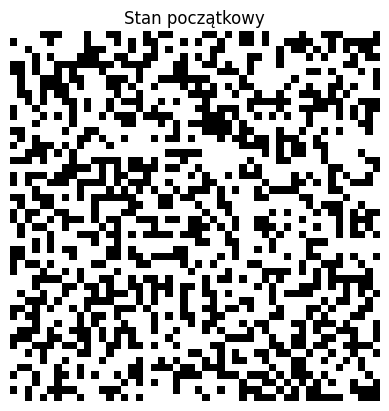

In [1125]:
plot_binary_image(image,'Stan początkowy')

In [1126]:
def neighbourhood_energy_vert(image, x, y, tellrange = False, tellval = False) :
    if tellval : return 0
    n = image.shape[0]
    field_val = 1
    if tellrange : 
        table = []
        for i in range(-1,2) :
            if i == 0 : continue
            if 0 <= y + i < n :
                table.append((x,y + i))
        return set(table),field_val
    energy = 0
    if image[x,y] != 0 :
        if y - 1 >= 0 :
            energy += image[x,y - 1]
        if y + 1 < n :
            energy += image[x,y + 1]
    
    return energy*field_val

In [1127]:
def neighbourhood_energy_hor(image, x, y, tellrange = False, tellval = False) :
    if tellval : return 0
    n = image.shape[0]
    field_val = 1
    if tellrange :
        table = []
        for i in range(-1,2) :
            if i == 0 : continue
            if 0 <= x + i < n :
                table.append((x + i,y))
        return set(table),field_val
    energy = 0
    if image[x,y] != 0 : 
        if x - 1 >= 0 :
            energy += image[x - 1,y]
        if x + 1 < n :
            energy += image[x + 1,y]
    return energy*field_val

In [1128]:
def neighbourhood_energy_vert_stripes(image, x, y, tellrange = False, tellval = False) :
    if tellval : return 0
    n = image.shape[0]
    field_val = 1
    if tellrange : 
        table = []
        for j in range(-1,2) :
            if j == 0 : continue
            for i in range(-1,2) :
                if 0 <= x + i < n and 0 <= y + j < n and image[x+i,y+j] == 1 :
                    table.append((x + i,y + j))
        return set(table),field_val
    energy = 0
    if image[x,y] != 0 :
        for j in range(-1,2) :
            if j == 0 : continue
            for i in range(-1,2) :
                if 0 <= x + i < n and 0 <= y + j < n and image[x+i,y+j] == 1 :
                    energy += image[x + i, y + j]
    
    return energy*field_val

In [1129]:
def neighbourhood_energy_hor_stripes(image, x, y, tellrange = False, tellval = False) :
    if tellval : return 0
    n = image.shape[0]
    field_val = 1
    if tellrange : 
        table = []
        for i in range(-1,2) :
            if i == 0 : continue
            for j in range(-1,2) :
                if 0 <= x + i < n and 0 <= y + j < n and image[x+i,y+j] == 1 :
                    table.append((x + i,y + j))
        return set(table),field_val
    energy = 0
    if image[x,y] != 0 :
        for i in range(-1,2) :
            if i == 0 : continue
            for j in range(-1,2) :
                if 0 <= x + i < n and 0 <= y + j < n and image[x+i,y+j] == 1 :
                    energy += image[x + i, y + j]
    
    return energy*field_val

In [1130]:
def neighbourhood_energy_divide(image,x,y,tellrange = False, tellval = False) :
    value = 0
    if tellval : return value
    n = image.shape[0]
    field_val = 1
    if tellrange : 
        table = []
        for i in range(-1,2) :
            for j in range(-1,2) :
                if i == 0 and j == 0 : continue
                if 0 <= x + i < n and 0 <= y + j < n and image[x+i,y+j] == 1 :
                    table.append((x + i,y + j))
        return set(table),field_val
    energy = 0
    if image[x,y] == 1 : 
        for i in range(-1,2) :
            for j in range(-1,2) :
                if i == 0 and j == 0 : continue
                if 0 <= x + i < n and 0 <= y + j < n :
                    energy += image[x + i, y + j]
    return energy*field_val


In [1131]:
def neighbourhood_energy_combine(image,x,y,tellrange = False, tellval = False) :
    value = -np.inf
    if tellval : return value
    n = image.shape[0]
    field_val = -1
    if tellrange : 
        table = []
        for i in range(-1,2) :
            for j in range(-1,2) :
                if i == 0 and j == 0 : continue
                if 0 <= x + i < n and 0 <= y + j < n and image[x+i,y+j] == 1 :
                    table.append((x + i,y + j))
        return set(table),field_val
    energy = 0
    if image[x,y] == 1 : 
        for i in range(-1,2) :
            for j in range(-1,2) :
                if i == 0 and j == 0 : continue
                if 0 <= x + i < n and 0 <= y + j < n :
                    energy += image[x+i,y+j]
    return energy*field_val

In [1132]:
def whole_energy(image, neighbourhood_energy_function,matrix = False) :
    n = image.shape[0]
    if matrix :
        tab = np.zeros((n, n))
    energy = 0
    for i in range(n) :
        for j in range(n) :
            val = neighbourhood_energy_function(image,i,j)
            energy += val
            if matrix : tab[i][j] = val
    if matrix : return tab
    return energy

In [1133]:
def find_swap(image, neighbourhood_energy_function, a_ind, b_ind, d_E, val) :
    d_E += neighbourhood_energy_function(image,a_ind[0],a_ind[1])*val
    d_E += neighbourhood_energy_function(image,b_ind[0],b_ind[1])*val
    
    a_set,a_val = neighbourhood_energy_function(image,a_ind[0],a_ind[1],True)
    b_set,b_val = neighbourhood_energy_function(image,b_ind[0],b_ind[1],True)
    
    intersection_set = a_set.intersection(b_set)
    intersection_set.update({a_ind, b_ind})
    a_set.difference_update(intersection_set)
    b_set.difference_update(intersection_set)
    
    a_set.update(b_set)
    
    for x,y in a_set :
        d_E += neighbourhood_energy_function(image,x,y)*val

    return d_E

In [1134]:
def simulated_annealing_image(image, neighbourhood_energy_function, iterations = 5000, T = 3000, cooling_rate = 0.995) :
    n = image.shape[0]
    E = whole_energy(image, neighbourhood_energy_function)
    E_tab = [E]
    temp_tab = [T]
    counter = 0
    
    function_val = neighbourhood_energy_function(image,0,0,False,True)
    start = time.time()
    
    for _ in range(iterations) :
        if _ % (iterations // 10) == 0 : print(_ // (iterations // 100),'%, E =',E, 'Time:',round(time.time()-start,2))
        if E <= function_val : # or (function_val == -np.inf and (len(E_tab) > 1 and E_tab[-1] == E_tab[-2] and T < 10**-3)) :
            counter += 1
        if counter > _/10 and counter > 0 : 
            print(100,'%, E =',E, ' Time:',round(time.time()-start,2))
            print(counter)
            return E_tab, temp_tab, image
        a_ind = (np.random.choice(n),np.random.choice(n))
        b_ind = (np.random.choice(n),np.random.choice(n))
        
        while image[b_ind] == image[a_ind] :
            b_ind = (np.random.choice(n),np.random.choice(n))
        
            
        if image[b_ind] != 1 :
            a_ind,b_ind = b_ind,a_ind
        
        d_E = 0
        d_E = find_swap(image, neighbourhood_energy_function, a_ind, b_ind, d_E, -1)
        image[b_ind],image[a_ind] = image[a_ind],image[b_ind]
        d_E = find_swap(image, neighbourhood_energy_function, a_ind, b_ind, d_E, 1)
                
        if (d_E < 0) or (np.exp(-d_E/T) > np.random.uniform(0,1)) :
            E += d_E
        else :
            image[b_ind],image[a_ind] = image[a_ind],image[b_ind]
        
        T *= cooling_rate
        E_tab.append(E)
        temp_tab.append(T)
    print(100,'%, E =',E, ' Time:',round(time.time()-start,2))
    
    return E_tab, temp_tab, image

In [1135]:
energy_function = neighbourhood_energy_combine
print(whole_energy(image,energy_function))
# plot_points_e, plot_points_t, new_image = simulated_annealing_image(image, energy_function, 3_000_000, 100, 0.99999)
plot_points_e, plot_points_t, new_image = simulated_annealing_image(image, energy_function, 100_000, 1_000, 0.999)

-3006
0 %, E = -3006 Time: 0.0


10 %, E = -5404 Time: 0.98
20 %, E = -6480 Time: 1.98
30 %, E = -6802 Time: 2.99
40 %, E = -6910 Time: 4.02
50 %, E = -7026 Time: 5.03
60 %, E = -7096 Time: 6.02
70 %, E = -7146 Time: 7.01
80 %, E = -7176 Time: 8.02
90 %, E = -7218 Time: 9.03
100 %, E = -7236  Time: 10.02


In [1136]:
def plot_graph(plot_points,title = '', y_label = '', x_label = '') :
    plt.plot([_ for _ in range(len(plot_points))], plot_points)

    col = 'red'
    if plot_points[-1] < plot_points[0] :
        col = 'green'

    plt.axhline(y=plot_points[0], color=col, linestyle='--')

    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()
    print(f"0: {plot_points[0]}, {len(plot_points) - 1}: {plot_points[-1]}")

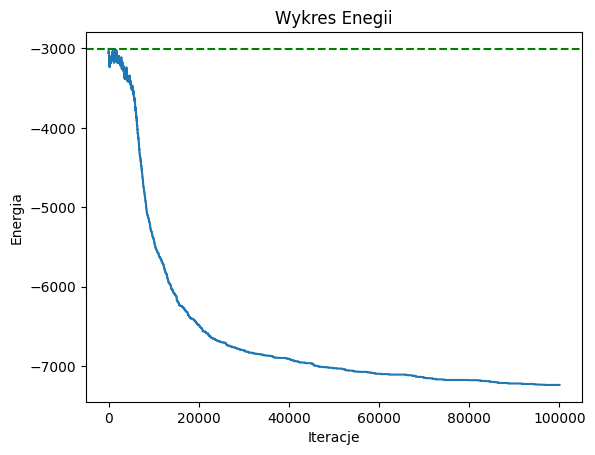

0: -3006, 100000: -7236


In [1137]:
plot_graph(plot_points_e,'Wykres Enegii','Energia','Iteracje')

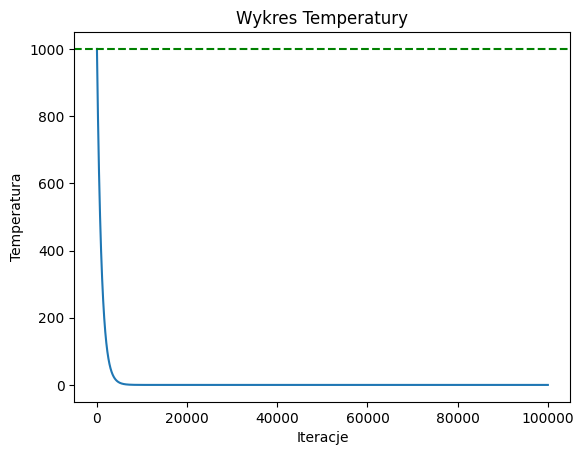

0: 1000, 100000: 3.5385276883431166e-41


In [1138]:
plot_graph(plot_points_t,'Wykres Temperatury','Temperatura','Iteracje')

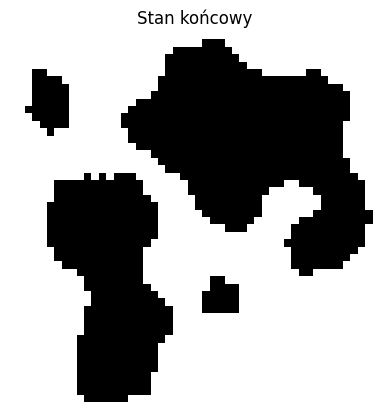

-7236


In [1139]:
plot_binary_image(new_image,'Stan końcowy')



print(whole_energy(new_image,energy_function))